Now, let me explain the code and how to interpret the results:

Code Explanation:
a. Data Loading and Preprocessing:

The code loads data from multiple CSV files, each representing a different HTOL machine.
It combines these into a single DataFrame, adding a 'machine_id' column to distinguish between machines.
The 'Time' column is converted to datetime format for easier manipulation.

b. Feature Engineering:

Extracts time-based features like hour, day of week, month, and whether it's a weekend.
Calculates rolling statistics (mean and standard deviation) of the ChlPrs (Chiller Pressure) values.
Computes the time since the last alert for each alert type.

c. Model Preparation:

For each alert type (LOW, MEDIUM, HIGH, SIGMA), it prepares a target variable representing the time until the next alert of that type.
It filters out data points where the next alert is beyond the prediction horizon (30 days in this case).

d. Model Training and Evaluation:

Uses a Random Forest Regressor to predict the time until the next alert.
Splits the data into training and testing sets.
Scales the features using StandardScaler.
Trains the model and evaluates it using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

e. Visualization:

Creates a plot for each alert type, showing actual alerts and predicted alerts for each machine.
Actual alerts are represented by circles, predicted alerts by crosses.
Each machine is represented by a row in the plot, with actual and predicted alerts slightly offset for better visibility.


Interpreting the Results:
a. Metrics:

Mean Absolute Error (MAE): This represents the average number of days the model's predictions are off. For example, if MAE is 2.5 days, on average, the model's predictions are off by 2.5 days.
Root Mean Squared Error (RMSE): Similar to MAE, but gives more weight to larger errors. It's always larger than or equal to MAE. A larger difference between RMSE and MAE indicates more variability in the errors.

How to explain to managers: "Our model predicts the time until the next alert with an average error of X days (MAE). The RMSE of Y days indicates that there's some variability in our predictions, with some being more accurate and others less so."
b. Visualizations:

Each row represents a different HTOL machine.
Blue circles represent actual alerts that occurred.
Orange crosses represent predicted alerts.
The x-axis shows the date/time.

How to explain to managers: "This chart shows our model's performance for each machine. Blue circles are actual alerts that occurred, while orange crosses are our model's predictions. When orange crosses align closely with blue circles, it means our model accurately predicted an alert. Clusters of orange crosses without nearby blue circles might indicate false positives, while blue circles without nearby orange crosses could be missed alerts."
c. Prediction Example:

The code provides an example of predicting the time until the next alert for each alert type using the most recent data point.

How to explain to managers: "Based on the current state of our machines, our model predicts that the next LOW alert will occur in X days, the next MEDIUM alert in Y days, and so on. This allows us to prioritize maintenance and potentially prevent alerts before they occur."
Potential Improvements to Discuss with Managers:

Consider the balance between false positives and missed alerts. Depending on the cost of each, you might want to adjust the model's sensitivity.
Look into the features that are most predictive of each alert type. This could provide insights into what factors are leading to alerts.
Consider implementing a sliding window approach for continuous monitoring and prediction.
Explore the possibility of using more advanced time series models or deep learning approaches for potentially improved accuracy.



Remember to emphasize that while the model provides valuable insights, it's a tool to aid decision-making, not replace it. Regular monitoring, validation, and updating of the model will be crucial for maintaining its effectiveness over time.

In [1]:
import pandas as pd
import numpy as np
import os

**Code 3: Predicting Time to Next Alert (Regression)**

**Integration into Production:**

1. **Data Pipeline:**
   - Establish a continuous data pipeline to feed real-time or near real-time `ChlPrs` data from the HTOL machines into the prediction system. This could involve data streaming platforms like Kafka or Apache Pulsar, or regular data transfers from a database.
   - Ensure data quality checks and preprocessing steps (like outlier handling and missing value imputation) are integrated into the pipeline.

2. **Feature Engineering:**
   - Implement the `engineer_features` function within the data pipeline to generate the necessary features (time-based features, rolling statistics, time since last alerts) from the incoming `ChlPrs` data.

3. **Model Deployment:**
   - Deploy the trained Random Forest Regressor models (one for each alert type) using a suitable model serving framework like TensorFlow Serving, TorchServe, or a cloud-based solution like AWS SageMaker or Google AI Platform.
   - Expose the deployed models via an API endpoint for prediction requests.

4. **Prediction Service:**
   - Create a prediction service that receives new data points (with engineered features) as input, scales the features using the saved `StandardScaler`, and sends them to the deployed models for prediction.
   - The service should return the predicted time to the next alert for each alert type as output.

5. **Monitoring and Alerting:**
   - Integrate the prediction service with a monitoring and alerting system. When the predicted time to the next alert falls below a defined threshold (e.g., a few days or hours), trigger an alert to notify engineers.
   - The alert could include information about the predicted alert type, the predicted time remaining, and the machine ID.

**Inputs and Outputs:**

- **Input:** A data point with the following features:
    - `ChlPrs`: Current Chiller Pressure value
    - Time-based features (hour, day of week, month, is_weekend)
    - Rolling mean and standard deviation of `ChlPrs`
    - Time since last alert for each alert type (`LOW`, `MEDIUM`, `HIGH`, `SIGMA`)
- **Output:** Predicted time (in days) to the next alert for each alert type (`LOW`, `MEDIUM`, `HIGH`, `SIGMA`).

**How Engineers Can Use the Predictions:**

- **Proactive Maintenance:** Schedule maintenance activities before predicted alerts occur, minimizing downtime and potential damage to the machines.
- **Resource Optimization:** Allocate maintenance resources more effectively based on predicted alert times and prioritize critical alerts.
- **Root Cause Analysis:** Investigate patterns in predicted alerts to identify underlying issues or trends that may be contributing to machine failures.
- **Performance Monitoring:** Track the accuracy of predictions over time and identify areas for model improvement or data quality enhancements.

**Code 4: Predicting Alert Risk (Classification)**

**Integration into Production:**

1. **Data Pipeline:** Similar to Code 3, establish a continuous data pipeline to feed real-time or near real-time `ChlPrs` data into the system.

2. **Feature Engineering:** Implement the `engineer_features` function within the data pipeline to generate the required features.

3. **Model Deployment:** Deploy the trained Random Forest Classifier models (one for each alert type) using a model serving framework.

4. **Prediction Service:**
   - Create a prediction service that receives new data points (with engineered features) as input, scales the features using the saved `StandardScaler`, and sends them to the deployed models for prediction.
   - The service should return the predicted probability of each alert type occurring within the prediction window as output.

5. **Risk Assessment and Alerting:**
   - Define probability thresholds for each alert type to classify data points as "high risk." These thresholds can be based on the desired balance between false positives and missed alerts, considering the severity and cost associated with each alert type.
   - If the predicted probability for an alert type exceeds its threshold, trigger an alert to notify engineers about the elevated risk. The alert should include the machine ID, alert type, and predicted probability.

**Inputs and Outputs:**

- **Input:** A data point with the same features as in Code 3.
- **Output:** Predicted probability of each alert type (`LOW`, `MEDIUM`, `HIGH`, `SIGMA`) occurring within the prediction window (e.g., 7 days).

**How Engineers Can Use the Predictions:**

- **Prioritize Maintenance:** Focus maintenance efforts on machines and time periods with high predicted probabilities of alerts, especially for critical alert types.
- **Early Intervention:** Take preemptive actions to mitigate potential issues when the model predicts an elevated risk of an alert, potentially preventing it from occurring altogether.
- **Resource Allocation:** Optimize resource allocation by considering the predicted risk levels for different machines and alert types.
- **Continuous Monitoring:** Continuously monitor the predicted probabilities and adjust maintenance schedules or investigate further if the risk levels consistently remain high.

**Key Considerations for Both Codes:**

- **Model Retraining:** Regularly retrain the models with new data to ensure they adapt to changing machine behavior and maintain prediction accuracy.
- **Explainability:** Consider using techniques like SHAP (SHapley Additive exPlanations) to provide engineers with insights into why the model is making certain predictions, increasing trust and facilitating better decision-making.
- **Feedback Loop:** Implement a feedback mechanism for engineers to report incorrect predictions or provide additional context. This feedback can be used to refine the models and improve their performance over time.
- **User Interface:** Develop a user-friendly interface to visualize the predictions, alert history, and other relevant information, making it easy for engineers to understand and act upon the model's outputs.

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
import matplotlib.pyplot as plt

In [7]:
# Load and preprocess data
def load_and_preprocess_data(folder):
    dfs = []
    for i in range(9, 16):
        file_name = f"HTOL-{i:02d}_alerts.csv"
        df = pd.read_csv(os.path.join(folder, file_name))
        df['machine_id'] = f'HTOL-{i:02d}'
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['Time'] = pd.to_datetime(combined_df['Time'])
    combined_df = combined_df.sort_values(['machine_id', 'Time'])

    return combined_df

In [8]:

# Feature engineering
def engineer_features(df):
    df['hour'] = df['Time'].dt.hour
    df['day_of_week'] = df['Time'].dt.dayofweek
    df['month'] = df['Time'].dt.month
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

    # Calculate rolling statistics
    df['rolling_mean'] = df.groupby('machine_id')['ChlPrs'].rolling(window=24, min_periods=1).mean().reset_index(0, drop=True)
    df['rolling_std'] = df.groupby('machine_id')['ChlPrs'].rolling(window=24, min_periods=1).std().reset_index(0, drop=True)

    # Calculate time since last alert for each type
    alert_types = ['LOW', 'MEDIUM', 'HIGH', 'SIGMA']
    for alert_type in alert_types:
        df[f'time_since_{alert_type}'] = df.groupby('machine_id').apply(lambda x: x['Time'] - x[x['ALERT'] == alert_type]['Time'].shift(1)).reset_index(level=0, drop=True)
        df[f'time_since_{alert_type}'] = df[f'time_since_{alert_type}'].dt.total_seconds() / 3600  # Convert to hours

    return df

In [9]:

# Prepare data for model training
def prepare_data_for_model(df, target_alert_type, prediction_horizon):
    df['target'] = df.groupby('machine_id').apply(lambda x: x[x['ALERT'] == target_alert_type]['Time'].shift(-1) - x['Time']).reset_index(level=0, drop=True)
    df['target'] = df['target'].dt.total_seconds() / (24 * 3600)  # Convert to days

    # Remove rows where target is greater than the prediction horizon
    df = df[df['target'] <= prediction_horizon]

    # Remove rows with NaN targets (i.e., last occurrence of each alert type for each machine)
    df = df.dropna(subset=['target'])

    features = ['ChlPrs', 'hour', 'day_of_week', 'month', 'is_weekend', 'rolling_mean', 'rolling_std'] + [f'time_since_{at}' for at in ['LOW', 'MEDIUM', 'HIGH', 'SIGMA']]
    X = df[features]
    y = df['target']

    return X, y

In [10]:

# Train and evaluate model
def train_and_evaluate_model(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"Mean Absolute Error: {mae:.2f} days")
    print(f"Root Mean Squared Error: {rmse:.2f} days")

    return model, scaler

In [11]:
# Visualize actual and predicted alerts (improved version)
def visualize_alerts(df, model, scaler, target_alert_type, prediction_horizon):
    features = ['ChlPrs', 'hour', 'day_of_week', 'month', 'is_weekend', 'rolling_mean', 'rolling_std'] + [f'time_since_{at}' for at in ['LOW', 'MEDIUM', 'HIGH', 'SIGMA']]
    X = df[features]
    X_scaled = scaler.transform(X)

    df['predicted_days_to_alert'] = model.predict(X_scaled)
    df['predicted_alert_date'] = df['Time'] + pd.to_timedelta(df['predicted_days_to_alert'], unit='D')

    plt.figure(figsize=(20, 15))
    machines = df['machine_id'].unique()
    n_machines = len(machines)

    for i, machine_id in enumerate(machines):
        machine_df = df[df['machine_id'] == machine_id]

        # Plot actual alerts
        alerts = machine_df[machine_df['ALERT'] == target_alert_type]
        plt.scatter(alerts['Time'], [i-0.2] * len(alerts), marker='o', s=100, label=f'Actual {target_alert_type} Alert' if i == 0 else "")

        # Plot predicted alerts
        predicted_alerts = machine_df[machine_df['predicted_days_to_alert'] <= prediction_horizon]
        plt.scatter(predicted_alerts['predicted_alert_date'], [i+0.2] * len(predicted_alerts), marker='x', s=100, label=f'Predicted {target_alert_type} Alert' if i == 0 else "")

        plt.text(df['Time'].min(), i, machine_id, va='center', ha='right', fontweight='bold')

    plt.yticks(range(n_machines), [""] * n_machines)
    plt.xlabel('Date')
    plt.ylabel('Machine ID')
    plt.title(f'Actual vs Predicted {target_alert_type} Alerts')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_19373/670758071.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df[f'time_since_{alert_type}'] = df.groupby('machine_id').apply(lambda x: x['Time'] - x[x['ALERT'] == alert_type]['Time'].shift(1)).reset_index(level=0, drop=True)
/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_19373/670758071.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this w


Training model for LOW alerts:


/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_19373/3173276234.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['target'] = df.groupby('machine_id').apply(lambda x: x[x['ALERT'] == target_alert_type]['Time'].shift(-1) - x['Time']).reset_index(level=0, drop=True)
/Users/artemmosnin/opt/anaconda3/envs/amd/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/artemmosnin/opt/anaconda3/envs/amd/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/artemmosnin/op

Mean Absolute Error: 2.35 days
Root Mean Squared Error: 5.31 days


/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_19373/1234715538.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


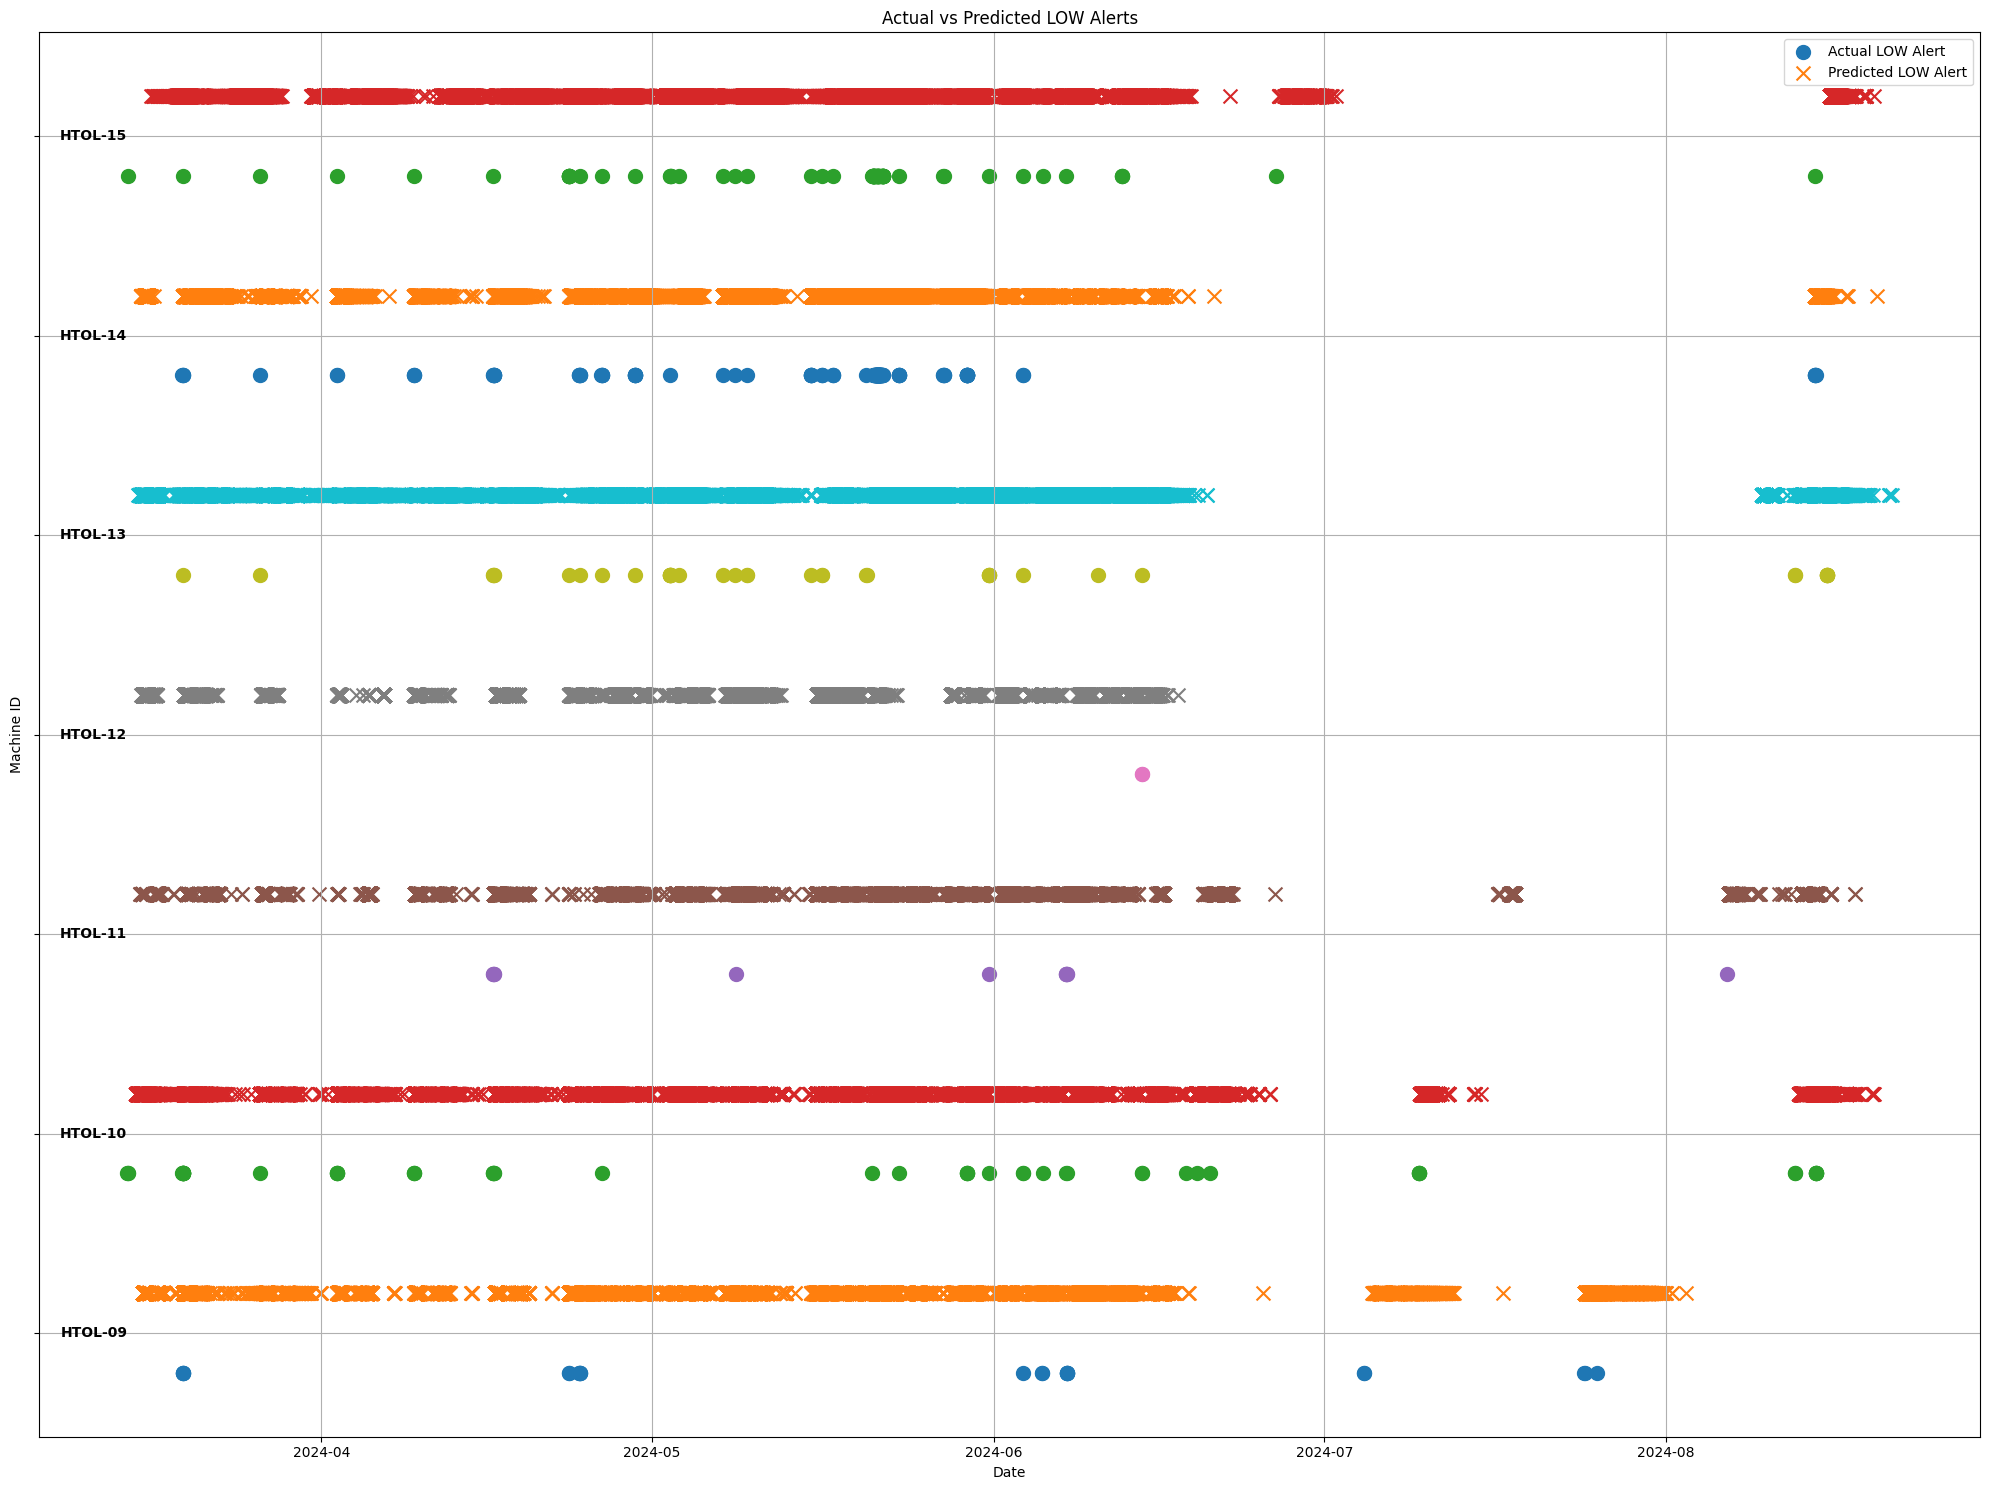


Training model for MEDIUM alerts:


/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_19373/3173276234.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['target'] = df.groupby('machine_id').apply(lambda x: x[x['ALERT'] == target_alert_type]['Time'].shift(-1) - x['Time']).reset_index(level=0, drop=True)
/Users/artemmosnin/opt/anaconda3/envs/amd/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/artemmosnin/opt/anaconda3/envs/amd/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/artemmosnin/op

Mean Absolute Error: 1.96 days
Root Mean Squared Error: 2.41 days


/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_19373/1234715538.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


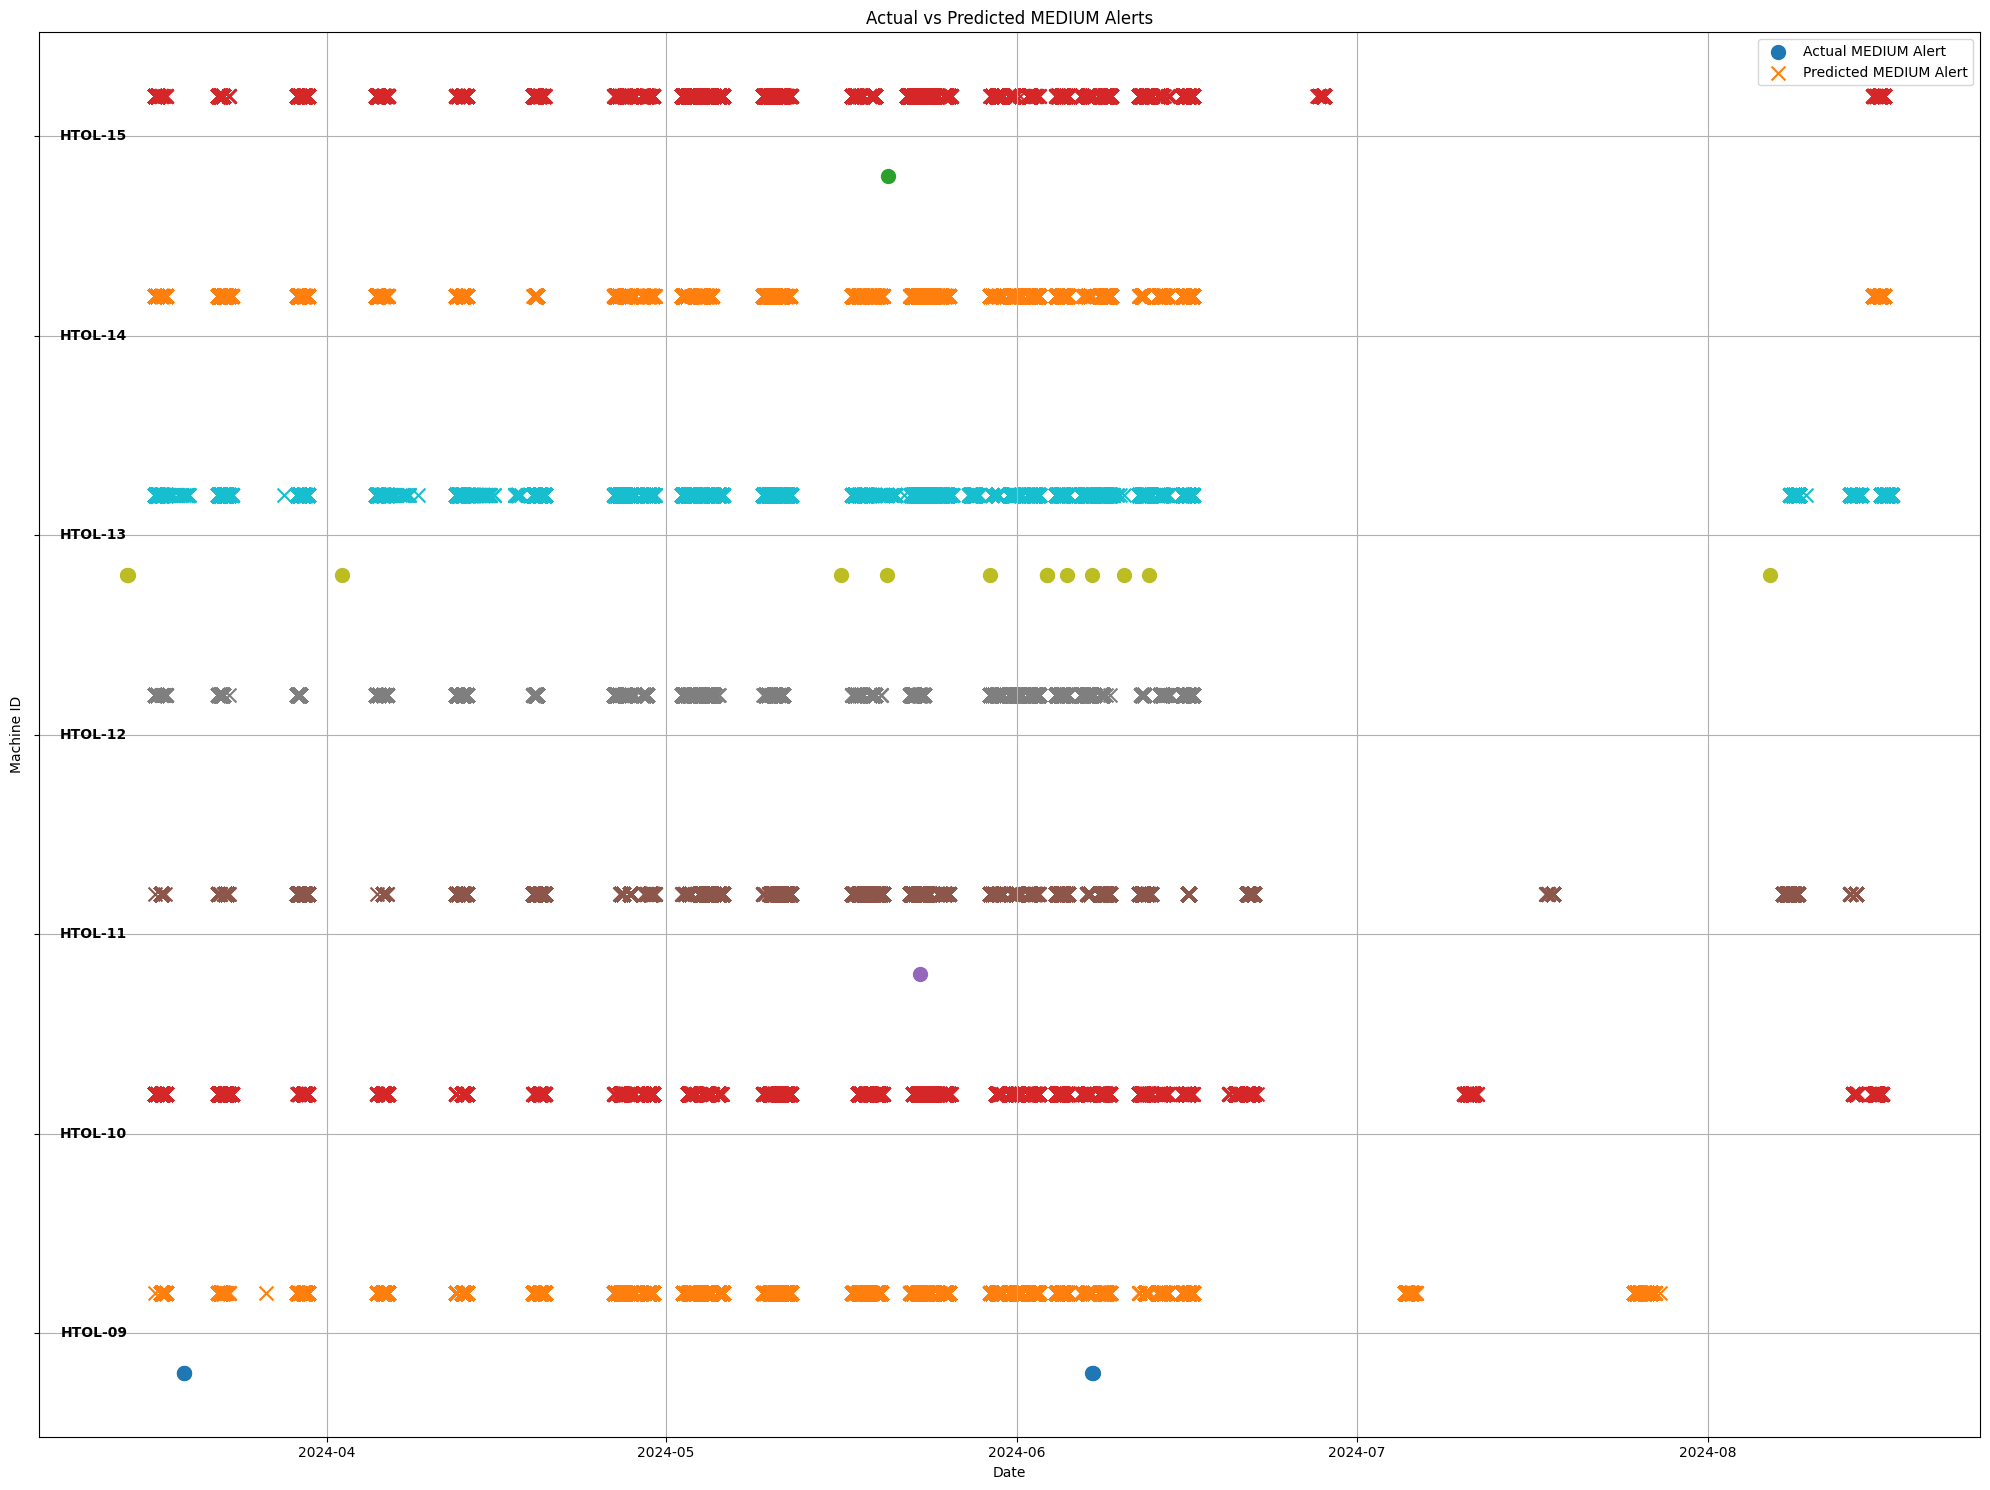


Training model for HIGH alerts:


/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_19373/3173276234.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['target'] = df.groupby('machine_id').apply(lambda x: x[x['ALERT'] == target_alert_type]['Time'].shift(-1) - x['Time']).reset_index(level=0, drop=True)
/Users/artemmosnin/opt/anaconda3/envs/amd/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/artemmosnin/opt/anaconda3/envs/amd/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/artemmosnin/op

Mean Absolute Error: 2.53 days
Root Mean Squared Error: 2.53 days


/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_19373/1234715538.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


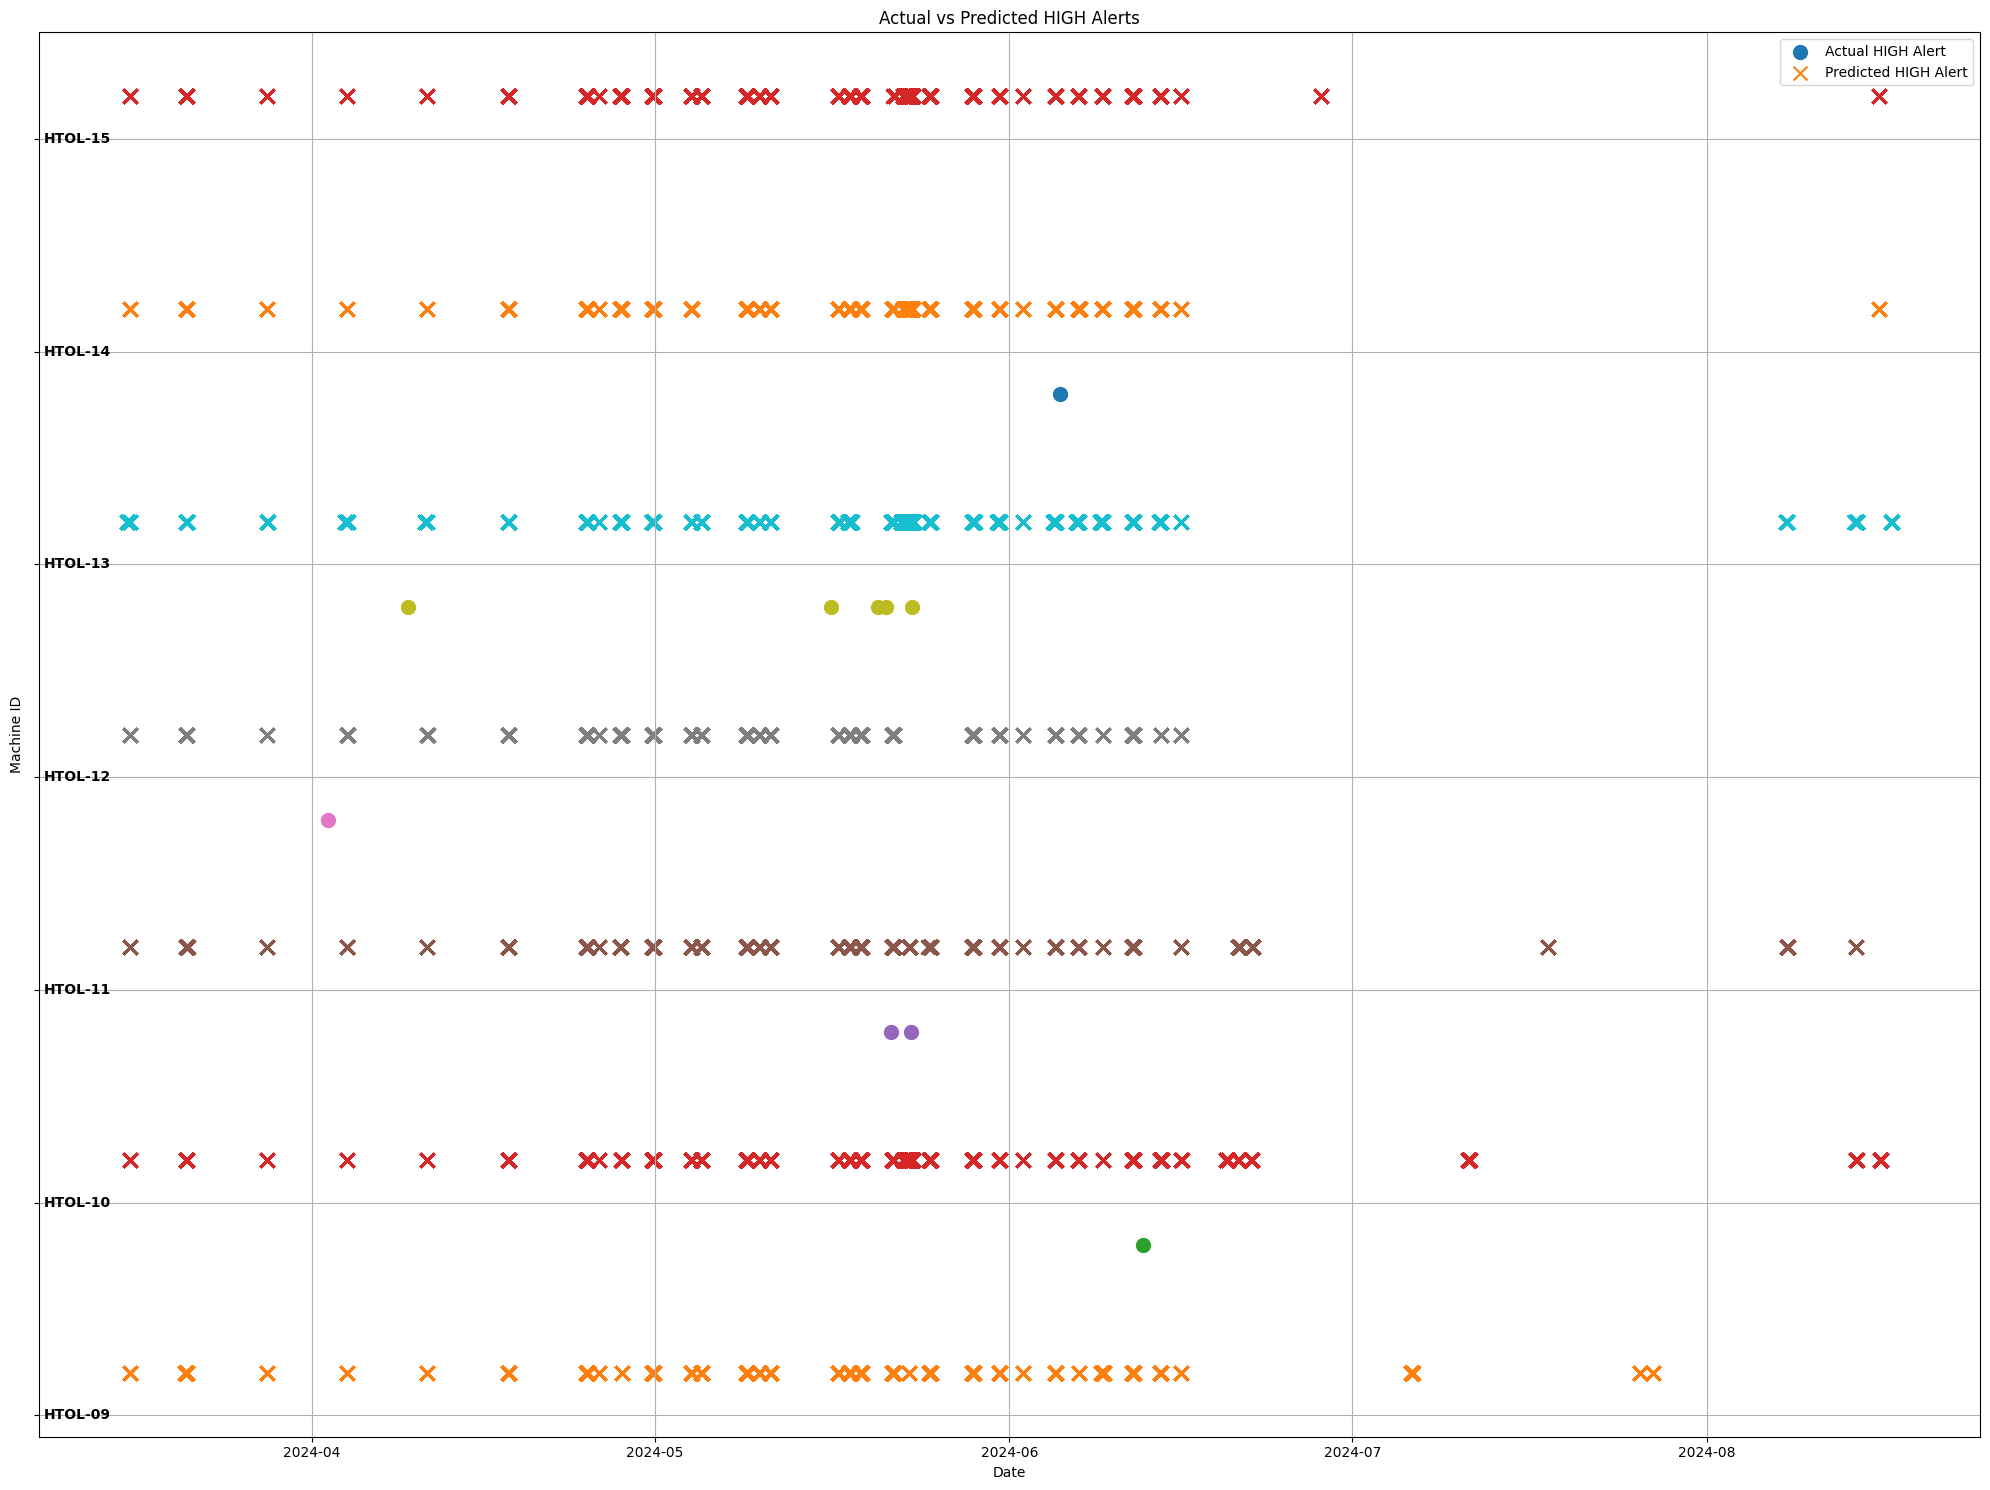


Training model for SIGMA alerts:


/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_19373/3173276234.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['target'] = df.groupby('machine_id').apply(lambda x: x[x['ALERT'] == target_alert_type]['Time'].shift(-1) - x['Time']).reset_index(level=0, drop=True)
/Users/artemmosnin/opt/anaconda3/envs/amd/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/artemmosnin/opt/anaconda3/envs/amd/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/artemmosnin/op

Mean Absolute Error: 3.15 days
Root Mean Squared Error: 3.23 days


/var/folders/d7/0np89js16x9b596pzk8m108c0000gn/T/ipykernel_19373/1234715538.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


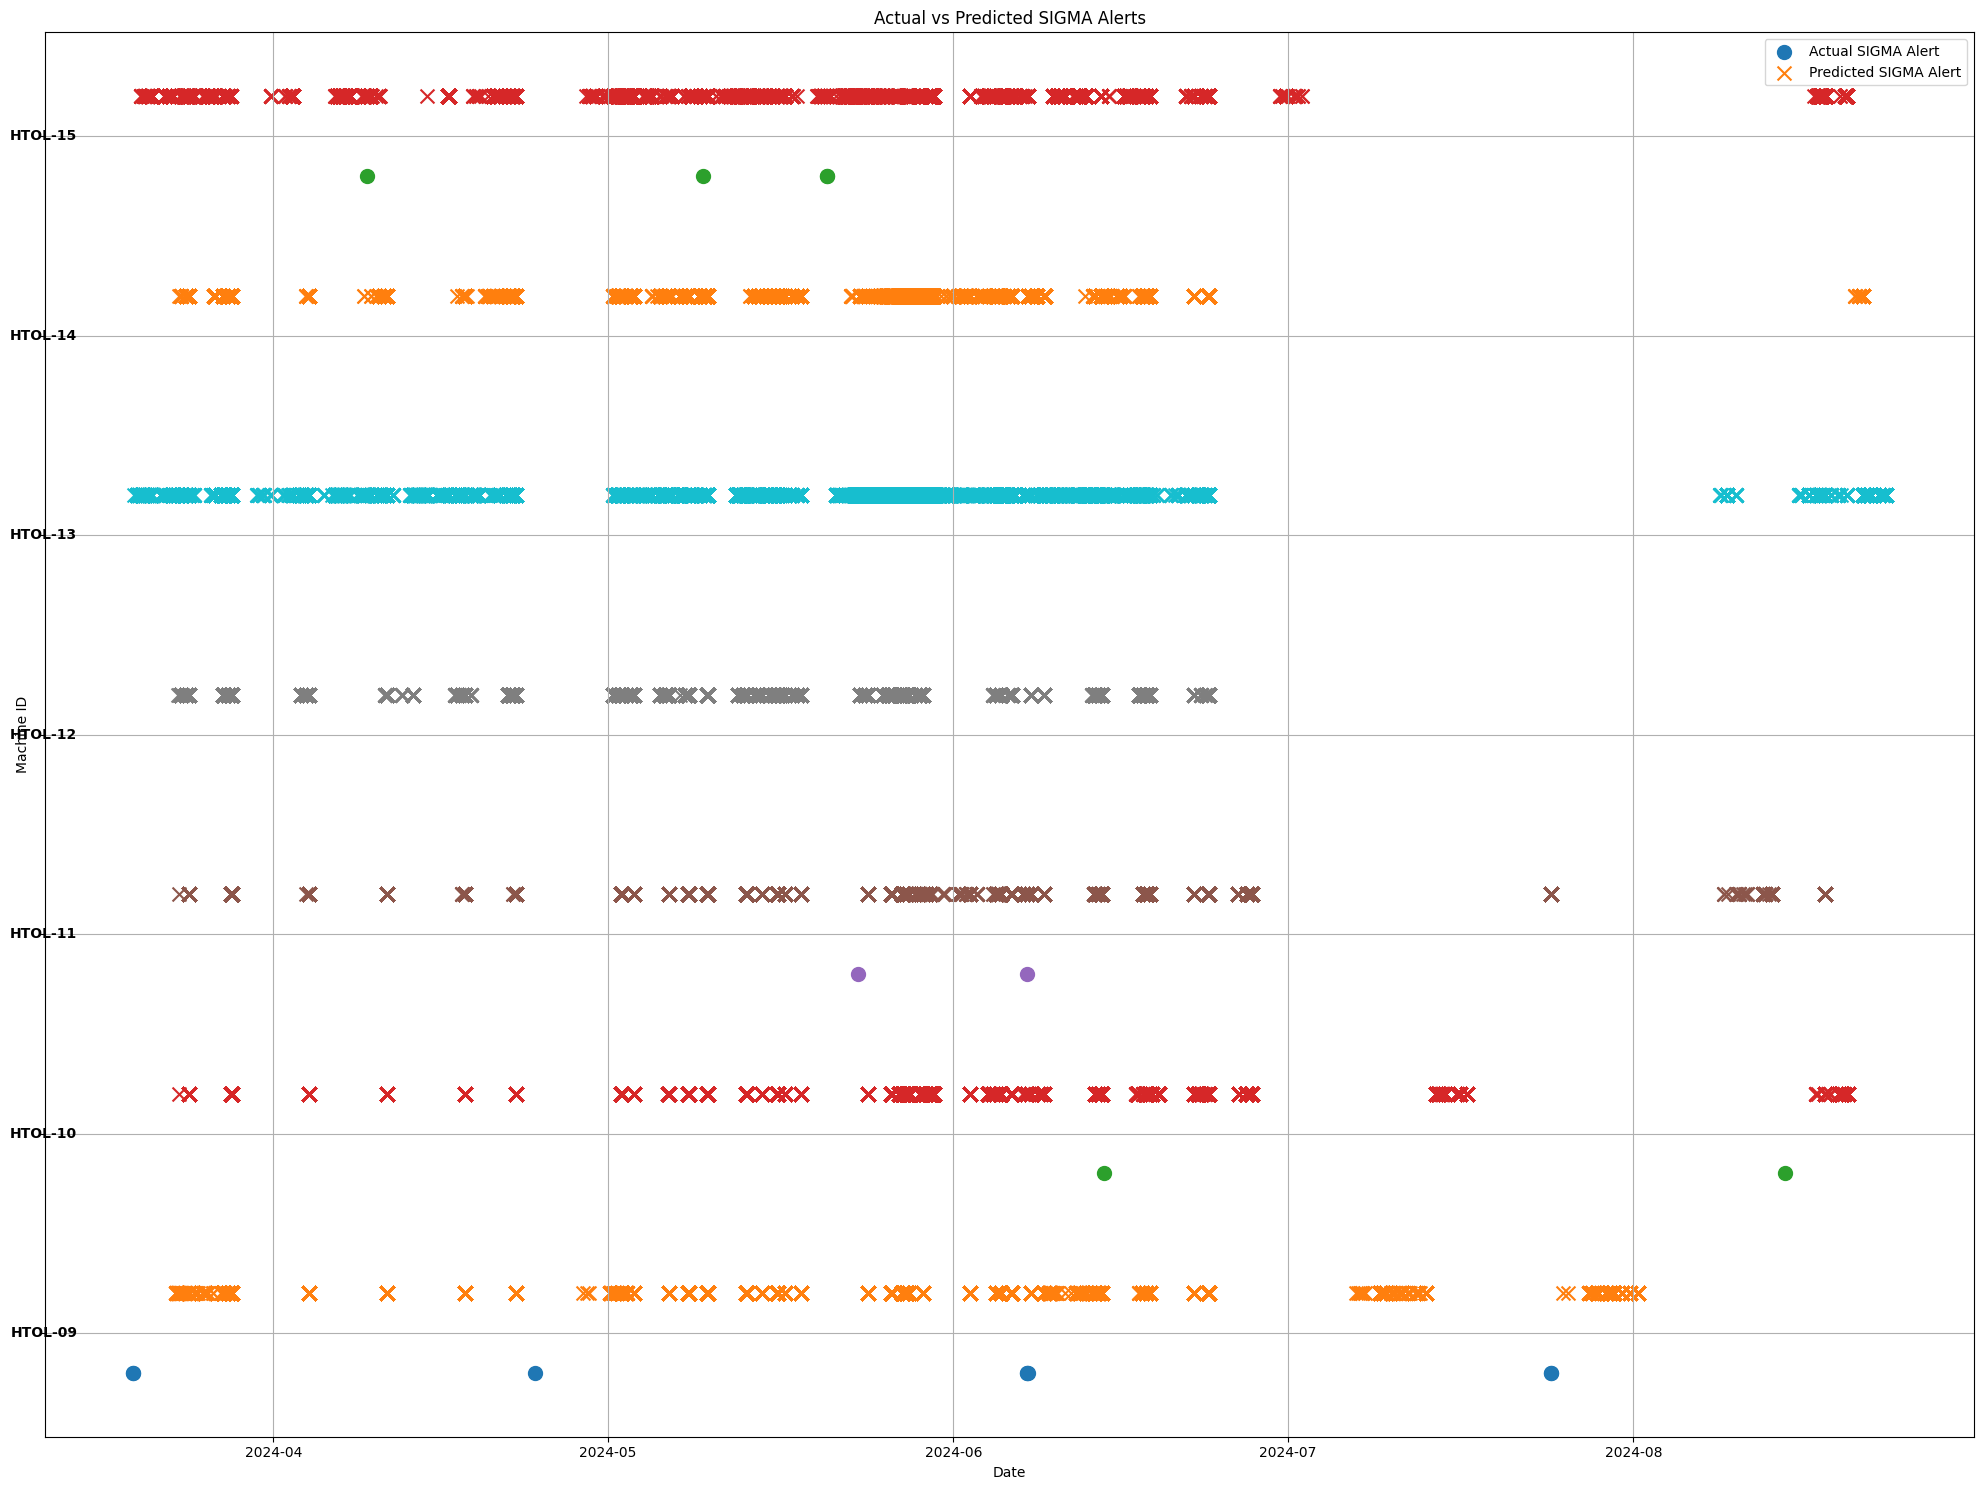

Predicted days until next LOW alert: 2.21
Predicted days until next MEDIUM alert: 1.66
Predicted days until next HIGH alert: 1.52
Predicted days until next SIGMA alert: 3.70


In [12]:

# Main execution
condition = True
if condition:
    folder = "../outlier_tolerance=5_grouping_time_window=200_anomaly_threshold=6_start_date=2022-01-01_end_date=2026-01-01"
    prediction_horizon = 30  # days

    # Load and preprocess data
    df = load_and_preprocess_data(folder)
    df = engineer_features(df)

    # Train and evaluate models for each alert type
    alert_types = ['LOW', 'MEDIUM', 'HIGH', 'SIGMA']
    models = {}
    scalers = {}

    for alert_type in alert_types:
        print(f"\nTraining model for {alert_type} alerts:")
        X, y = prepare_data_for_model(df, alert_type, prediction_horizon)
        model, scaler = train_and_evaluate_model(X, y)
        models[alert_type] = model
        scalers[alert_type] = scaler

        # Visualize actual and predicted alerts
        visualize_alerts(df, model, scaler, alert_type, prediction_horizon)

    # Example of making predictions for new data
    new_data = df.iloc[-1:].copy()  # Use the last row as an example
    for alert_type in alert_types:
        features = ['ChlPrs', 'hour', 'day_of_week', 'month', 'is_weekend', 'rolling_mean', 'rolling_std'] + [f'time_since_{at}' for at in alert_types]
        X_new = new_data[features]
        X_new_scaled = scalers[alert_type].transform(X_new)
        predicted_days = models[alert_type].predict(X_new_scaled)[0]
        print(f"Predicted days until next {alert_type} alert: {predicted_days:.2f}")